In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import lines
import matplotlib.cm as cm
import tqdm
from tqdm.notebook import tqdm as tqdm

import model_opt
import data_generate
import algo_GD

_t_max =10000
_cmap = plt.cm.jet
w_init = [10,10]

In [2]:
f = model_opt.Bohachevsky(err = 2)
algo = algo_GD.GD(w=w_init,t_max=_t_max)

In [3]:
# updateを行うたびに異なるノイズが加えられる
for i in tqdm(algo):
    algo.update(model=f,a=0.01)


In [4]:
w_store = np.array(algo.wstore)

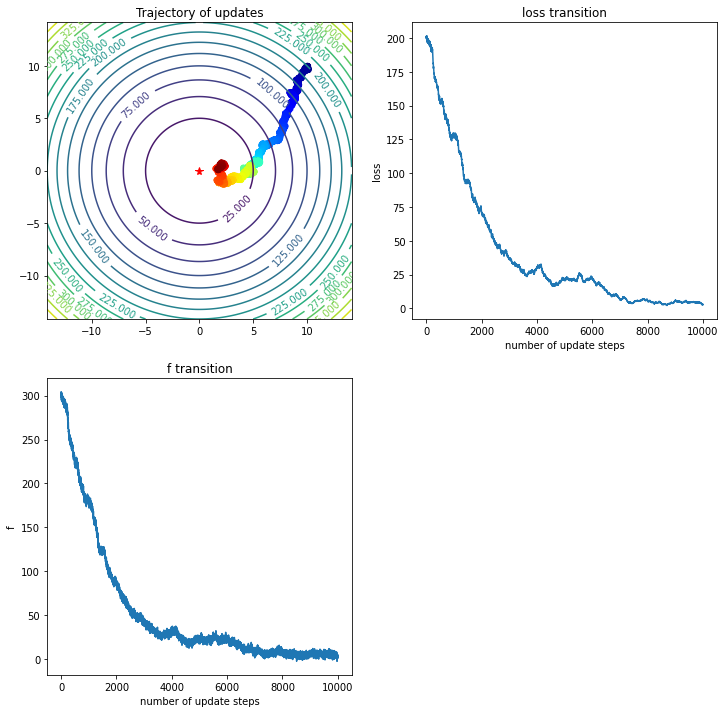

In [6]:
# 目的関数の真の値
w_star = f.w_star

# 等高線描画用
def circle(x, y,w):
    return (x-w) ** 2 + (y-w) ** 2

# wの軌跡
tmpdel = np.linalg.norm(w_star-w_init)
xvals = np.arange(w_star[0]-tmpdel, w_star[0]+tmpdel, 0.01)
yvals = np.arange(w_star[1]-tmpdel, w_star[1]+tmpdel, 0.01)
x1, x2 = np.meshgrid(xvals, yvals)
Z = circle(x1, x2,w_star[0])
myfig = plt.figure(figsize=(12,12))

ax1 = myfig.add_subplot(2,2,1)
plt.title("Trajectory of updates")
CS = ax1.contour(x1, x2, Z, levels=15)
c = np.linspace(0, _t_max, len(w_store))
ax1.scatter(w_store.T[0],w_store.T[1],c=c,cmap = _cmap,linewidths=0.01,alpha=0.5)
ax1.plot(*w_star, 'r*', markersize=8)
CS.clabel(inline=1, fontsize=10)


# 真の値とtステップ目のwとの２乗誤差の推移
ax2 = myfig.add_subplot(2,2,2)
loss_transition = algo.loss_store
plt.title("loss transition")
plt.xlabel('number of update steps')
plt.ylabel('loss')
ax2.plot(list(range(_t_max)),loss_transition)

# 関数値の推移
ax2 = myfig.add_subplot(2,2,3)
f_store = algo.f_store
plt.title("f transition")
plt.xlabel('number of update steps')
plt.ylabel('f')
ax2.plot(list(range(_t_max)),f_store)

In [8]:
# wについてステップ数での平均
algo.w_mean

[array([10., 10.]),
 array([9.99694312, 9.9922144 ]),
 array([10.00310383,  9.98477124]),
 array([10.00900803,  9.98920731]),
 array([10.01733294,  9.98771526]),
 array([10.01860847,  9.98662428]),
 array([10.02543166,  9.98969883]),
 array([10.02998384,  9.98910403]),
 array([10.03540399,  9.98673316]),
 array([10.03964559,  9.98392803]),
 array([10.04395849,  9.9829191 ]),
 array([10.04762318,  9.98287814]),
 array([10.04860714,  9.98085205]),
 array([10.05014327,  9.97734667]),
 array([10.0542526 ,  9.97487087]),
 array([10.05727157,  9.972769  ]),
 array([10.05934999,  9.97341918]),
 array([10.060328  ,  9.97359441]),
 array([10.06113047,  9.97441548]),
 array([10.05959928,  9.97448373]),
 array([10.0571613 ,  9.97256555]),
 array([10.05349032,  9.97194817]),
 array([10.05074255,  9.97112377]),
 array([10.04979966,  9.97084065]),
 array([10.04967105,  9.97098302]),
 array([10.05100541,  9.97070976]),
 array([10.05197541,  9.9714155 ]),
 array([10.05273727,  9.97213985]),
 array([10